En este experimento vamos a comprobar el rendimiento del Algoritmo de Descenso de Gradiente privado

Llamamos las librerias necesarias para el proyecto

In [1]:
from SetsManager import generate_data, get_random_in_sphere
from Loss import LossFunction
from PrivateGD import NoisyGD
from numpy.random import rand
from matplotlib.pyplot import hist, title, xlabel, ylabel, xticks, show

Seteamos los parámetros comunes del experimento

In [11]:
dim = 10
radio = 1
radio_data = 20
epsilon = 2
delta = 0.01
tamano_data = 1000
tamano_test = 1000
num_iter = 200
f = LossFunction()
f.L0 = 8*radio
f.L1 = 2
errores = []

Definimos las iteraciones y guardamos el error obtenido

In [ ]:
for t in range(num_iter):
    print(t)
    x_star = get_random_in_sphere(dim, radio)
    Y, Z = generate_data(x_star, tamano_data, radio_data, 0.05)
    model = NoisyGD(Z, Y, f, radio, epsilon, delta)
    model.run()
    Y_test, Z_test = generate_data(x_star, tamano_test, radio_data, 0.05)
    errores.append(f.set_f(model.x_final, Y_test, Z_test))

Graficamos los resultados del experimento

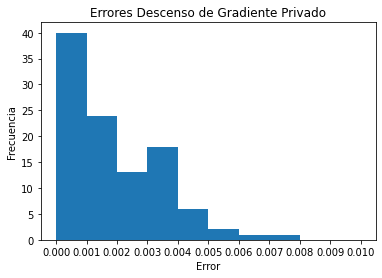

In [29]:
intervalos = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
hist(x = errores, bins = intervalos)
title("Errores Descenso de Gradiente Privado")
xlabel("Error")
ylabel("Frecuencia")
xticks(intervalos)
show()